# Question 01
Build a machine learning model to predict salary based on experience for
a given dataset \
https://drive.google.com/open?id=1UAbkc53H9fpJiEKCUICw1kXsrCdc0u
U1

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
# Reading in the data
try:
    df = pd.read_csv("Salary_Data.csv")
except Exception as e:
    print(f"Error : {e}")

### Data Processing and Analysis

In [3]:
df.head()   # Printing the first 5 rows of data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.tail()   # Printing the last 5 rows of data

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [5]:
df.shape

(30, 2)

In [6]:
df.describe()       # Generating statistical summary of the data

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


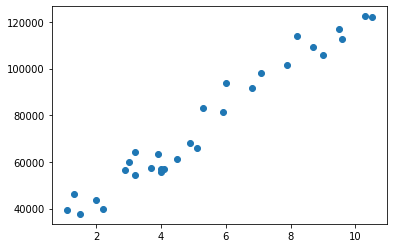

In [7]:
# visual representation of the data to find any observable relationships between provided attributes
plt.scatter(df['YearsExperience'], df['Salary'])
plt.show()

In [8]:
df.dtypes       # Checking the data types of the columns

YearsExperience    float64
Salary             float64
dtype: object

In [9]:
df.isnull().any()   # Checking the data for null values

YearsExperience    False
Salary             False
dtype: bool

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

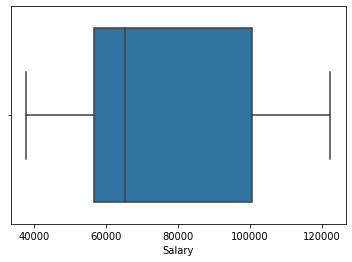

In [10]:
# Boxplot to find the outliers in the columns
sn.boxplot(df['Salary'])

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience'>

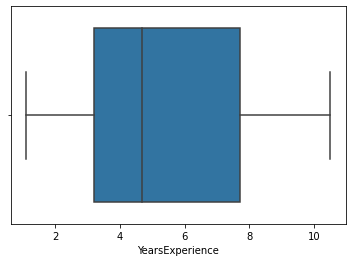

In [11]:
# Boxplot to find the outliers in the columns
sn.boxplot(df['YearsExperience'])

> There are no observable outliers in the data

In [12]:
# Function to remove the outliers from the whole dataset
def remove_outlier(data):
    quant_df = data.quantile([0.30, 0.70])
    for name in list(data.columns): data = data[(data[name] > quant_df.loc[0.30, name]) & (data[name] < quant_df.loc[0.70, name])]
    return data

> Visualizing the data to check for skewness and reduce it

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

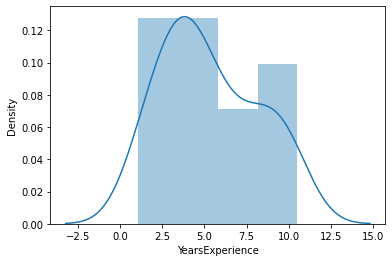

In [13]:
sn.distplot(df['YearsExperience'])

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

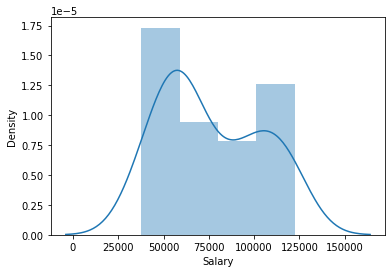

In [14]:
sn.distplot(df['Salary'])

In [15]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [16]:
df.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness is -0.044126086756988495
Mean is 11.173974914860956 , Median is  11.085708372140793


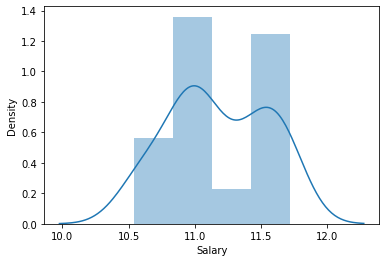

In [17]:
target = (np.log((df['Salary'])))
print ('Skewness is', target.skew())
print("Mean is",target.mean(), ", Median is ", target.median())
sn.distplot(target)
df['Salary'] = target

Skewness is -0.6005648582626513
Mean is 1.504978718402716 , Median is  1.5466563009464276


c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


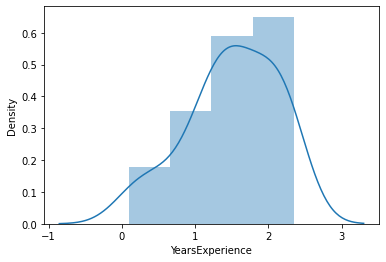

In [18]:
target = (np.log((df['YearsExperience'])))
print ('Skewness is', target.skew())
print("Mean is",target.mean(), ", Median is ", target.median())
sn.distplot(target)
df['YearsExperience'] = target

In [19]:
df.skew()

YearsExperience   -0.600565
Salary            -0.044126
dtype: float64

### Train/Test Split

In [20]:
X = np.array(df['YearsExperience']).reshape(-1, 1)
y = np.array(df['Salary']).reshape(-1, 1)

In [21]:
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

### Model Fitting and Training

In [22]:
try:
    regr = LinearRegression()
    regr.fit(X_train, y_train)
    print(regr.score(X_test, y_test))
except Exception as e:
    print(f"Error : {e}")

0.9463270115659962


### Model Testing

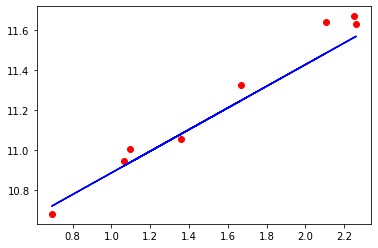

In [23]:
try:
    y_pred = regr.predict(X_test)
    plt.scatter(X_test, y_test, color ='red')
    plt.plot(X_test, y_pred, color ='blue')
    plt.show()
except Exception as e:
    print(f"Error : {e}")

### Evaluation Metrics

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
 
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.07010287568762785
MSE: 0.006690007717467417
RMSE: 0.0817924673638558


In [25]:
Accuracy = (1-mse)*100

In [26]:
print(Accuracy)

99.33099922825326
